## IMPORT MODULE

In [1]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = panda.read_csv(url, names=names)

In [3]:
print(dataset.shape)
print(dataset.head(100))

(150, 5)
    sepal-length  sepal-width  petal-length  petal-width            Class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
..           ...          ...           ...          ...              ...
95           5.7          3.0           4.2          1.2  Iris-versicolor
96           5.7          2.9           4.2          1.3  Iris-versicolor
97           6.2          2.9           4.3          1.3  Iris-versicolor
98           5.1          2.5           3.0          1.1  Iris-versicolor
99           5.7          2.8           4.1          1.3  Iris-versicolor

[100 rows x 5 columns]


## CLUSTERING

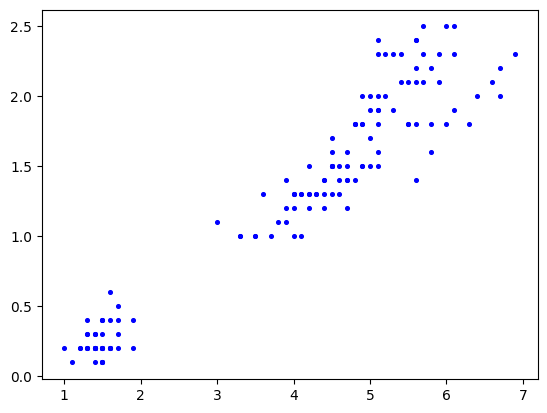

In [4]:
# Plot dataset

p1 = dataset['petal-length'].values
p2 = dataset['petal-width'].values
X2 = np.array(list(zip(p1, p2)))
plt.scatter(p1, p2, c="blue", s=7)

In [5]:
import sklearn.cluster as cluster

kmeans2 = cluster.KMeans(n_clusters=3)
kmeans2.fit(X2)

labels = kmeans2.predict(X2)
C2 = kmeans2.cluster_centers_
print(C2)

[[5.62608696 2.04782609]
 [1.464      0.244     ]
 [4.29259259 1.35925926]]


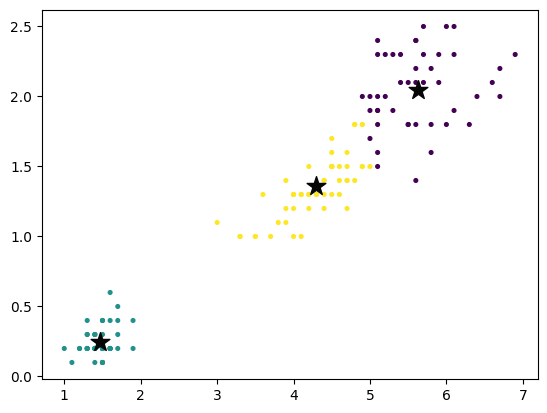

In [6]:
plt.scatter(X2[:, 0], X2[:, 1], s=7, c=labels)
plt.scatter(C2[:, 0], C2[:, 1], marker='*', s=200, c='#060606')

## INERTIA & SILHOUTTE

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [8]:
for k in range(1, 10) :
  kmeans2 = KMeans(n_clusters=k)
  kmeans2.fit(X2)
  labels2 = kmeans2.predict(X2)
  inertia2 = kmeans2.inertia_
  print("k:", k, "inertia:", inertia2)

k: 1 inertia: 550.6434666666671
k: 2 inertia: 86.40394533570999
k: 3 inertia: 31.38775897435898
k: 4 inertia: 19.499400899685114
k: 5 inertia: 14.209526322751321
k: 6 inertia: 11.163486299967428
k: 7 inertia: 9.402032912980737
k: 8 inertia: 8.398589675770456
k: 9 inertia: 7.230652335383914


In [9]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(X2, labels)

0.6600587422121155

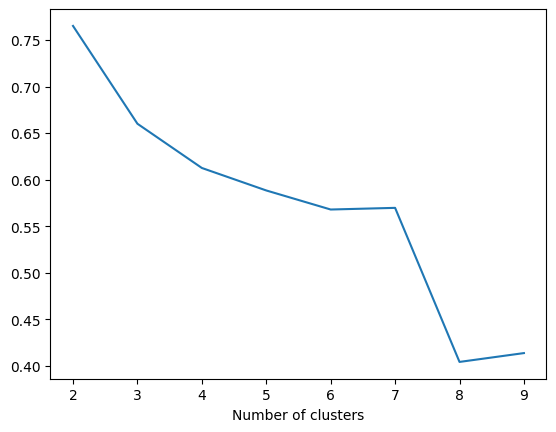

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

plt.plot([k for k in range(2, 10)],  # Start from k=2
         [silhouette_score(X2, KMeans(n_clusters=k).fit(X2).labels_) for k in range(2, 10)])  # Start from k=2
plt.xlabel('Number of clusters')
plt.show() # Show the plot

## ELBOW METHOD

In [16]:
%matplotlib inline
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

print(plt.style.available)

plt.style.use('seaborn-v0_8-dark')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [17]:
X = np.array(list(zip(p1, p2))).reshape(len(p2), 2)
SSE = []
K = range(1,10)
for k in K :
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel.fit(X)
  SSE.append(kmeansModel.inertia_)

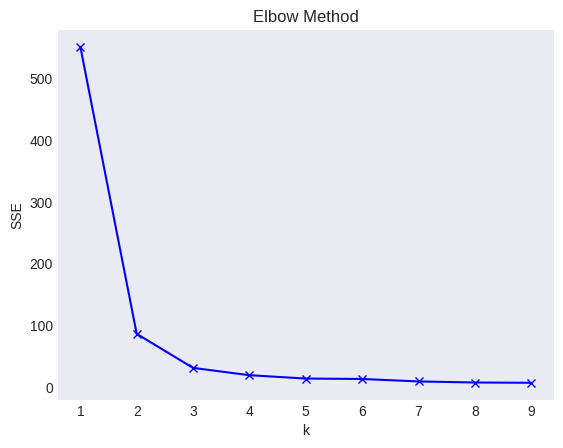

In [18]:
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

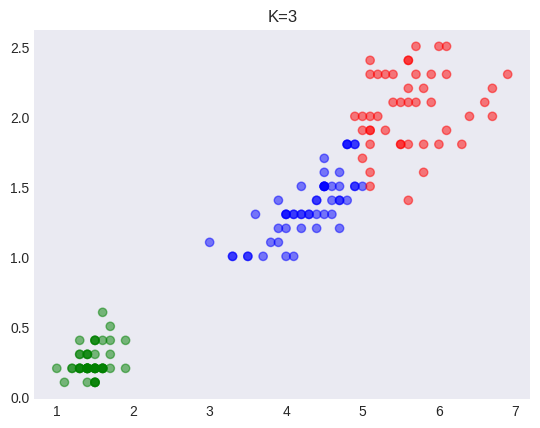

In [20]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.plot
LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'g',
                   2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in y_pred]
plt.scatter(p1, p2, c=label_color, alpha=0.5)
plt.title("K=3")
plt.show()

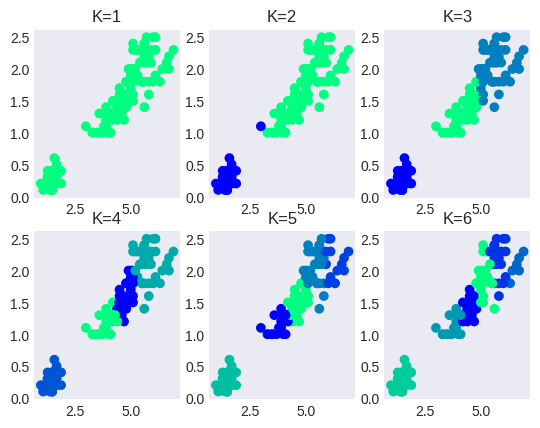

In [21]:
figure, ax = plt.subplots(2,3)
K = range(1,7)
for k in K :
  if (k < 4) :
    row = 0
    column = k-1
  else :
    row = 1
    column = k-4
  kmeansModel = KMeans(n_clusters=k)
  kmeansModel.fit(X)
  y_pred = kmeansModel.predict(X)
  ax[row][column].scatter(p1, p2, c=y_pred, cmap='winter_r')
  ax[row][column].set_title("K="+str(k))
plt.show()